In [29]:
import warnings
warnings.filterwarnings('ignore')

Чтение файла построчно:

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
Создание DataFrame:

Python
df = pd.DataFrame(lines, columns=['text'])
Удаление символов новой строки и пробелов по краям, замена пустых строк на NaN:
Мы используем метод str.strip для удаления символов новой строки и пробелов по краям, затем заменяем пустые строки на pd.NA.

df['text'] = df['text'].str.strip().replace('', pd.NA)

Удаление строк с NaN значениями в столбце text:
Мы используем метод dropna для удаления строк, где в столбце text находятся значения NaN.

df = df.dropna(subset=['text'])

Добавление индексного столбца id:
Пересоздаем индексы DataFrame с помощью reset_index и добавляем индексный столбец id.

df.reset_index(inplace=True, drop=True)
df.insert(0, 'id', df.index)

Сохраняем очищенный текст в новый CSV файл с индексным столбцом.

cleaned_file_path = r'f:\chatepc\chatalx\work\data\poslanie_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

Этот код удаляет строки, содержащие NaN значения в столбце text, и сохраняет результат в новый файл. Если у вас возникнут дополнительные вопросы или потребуется помощь с другими задачами, дайте знать!

In [30]:
import pandas as pd

# Путь к файлу
file_path = r'f:\chatepc\chatalx\work\data\wp.txt'

# Чтение файла построчно
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Создание DataFrame
df = pd.DataFrame(lines, columns=['text'])

# Удаление символов новой строки '\n' и пустых строк
df['text'] = df['text'].str.strip().replace('', pd.NA).dropna()

# Добавление индексного столбца 'id'
df.reset_index(inplace=True)
df.rename(columns={'index': 'id'}, inplace=True)



# Пример вывода первых 5 строк очищенного текста
df.head(20)

# Сохранение очищенного текста в новый файл
# cleaned_file_path = r'f:\chatepc\chatalx\work\data\poslanie_cleaned.txt'
# df.to_csv(cleaned_file_path, sep='\n', index=False, header=False)

,id,text
0,0,Лев Николаевич Толстой
1,1,NaN
2,2,Война и мир. Том 1
3,3,NaN
4,4,ЧАСТЬ ПЕРВАЯ
5,5,NaN
6,6,I.
7,7,NaN
8,8,"-- Еh bien, mon prince. G?nes et Lucques ne so..."
9,9,Так говорила в июле 1805 года известная Анна П...


In [31]:
# df['text'] = df['text'].str.replace('NaN',")
# df['text'] = df['text'].fillna('')
df_clean = df.dropna()
df_clean.head(20)

,id,text
0,0,Лев Николаевич Толстой
2,2,Война и мир. Том 1
4,4,ЧАСТЬ ПЕРВАЯ
6,6,I.
8,8,"-- Еh bien, mon prince. G?nes et Lucques ne so..."
9,9,Так говорила в июле 1805 года известная Анна П...
10,10,"""Si vous n'avez rien de mieux ? faire, M. le c..."
11,11,"-- Dieu, quelle virulente sortie [4] -- отвеча..."
12,12,"-- Avant tout dites moi, comment vous allez, c..."
13,13,-- Как можно быть здоровой... когда нравственн...


In [32]:
import string
import re
# Регулярное выражение для поиска римских цифр с точкой
roman_numeral_pattern = r'\b[IVXLCDM]+\.\b'

# Удаление римских цифр с точкой из столбца 'text'
df['text'] = df['text'].str.replace(roman_numeral_pattern, '', regex=True)

In [33]:
import string

df['text'] = df['text'].str.translate(str.maketrans('', '', string.punctuation)) # Удаление пунктуации

In [34]:

# # Регулярное выражение для поиска римских цифр
# roman_numeral_pattern = r'\b[IVXLCDM]+\b'
# # Удаление римских цифр из столбца 'text'
# df['text'] = df['text'].str.replace(roman_numeral_pattern, '', regex=True)
df.sample(20)

,id,text
10222,10222,Ah maman ne dites pas de btises Vous ne compr...
8511,8511,Государь император сейчас будет сказал Расто...
10454,10454,Граф хотел чтото сказать но видимо воздержался...
8801,8801,Ежели изволили заметить беспорядки в саду го...
8366,8366,Пьер за этот год так потолстел что он был бы у...
2021,2021,Ростов не подумал о том что значит требование ...
3585,3585,сноска 35 компаньонка малютка мила
10632,10632,Что говорить крикнул худощавый У меня тут в...
12139,12139,III
2630,2630,сноска 55 Вот удовольствие лагеря князь


In [35]:
# Приведение всех строк к нижнему регистру
df['text'] = df['text'].str.lower()

# Список стоп-слов
stopwords = set(["сноска","и", "в", "во", "не", "что", "он", "на", "я", "с", "со", "как", "а", "то", "все", "она", "так", "его", "но", "да", "ты", "к", "у", "же", "вы", "за", "бы", "по", "только", "ее", "мне", "было", "вот", "от", "меня", "еще", "нет", "о", "из", "ему", "теперь", "когда", "даже", "ну", "вдруг", "ли", "если", "уже", "или", "ни", "быть", "был", "него", "до", "вас", "нибудь", "опять", "уж", "вам", "ведь", "там", "потом", "себя", "ничего", "ей", "может", "они", "тут", "где", "есть", "надо", "ней", "для", "мы", "тебя", "их", "чем", "была", "сам", "чтоб", "без", "будто", "чего", "раз", "тоже", "себе", "под", "жизнь", "будет", "ж", "тогда", "кто", "этот", "говорил", "того", "потому", "этого", "какой", "совсем", "ним", "здесь", "этом", "один", "почти", "мой", "тем", "чтобы", "нее", "кажется", "сейчас", "были", "куда", "зачем", "сказать", "всех", "никогда", "сегодня", "можно", "при", "наконец", "два", "об", "другой", "хоть", "после", "над", "больше", "тот", "через", "эти", "нас", "про", "них", "какая", "много", "разве", "три", "эту", "моя", "впрочем", "хорошо", "свою", "этой", "перед", "иногда", "лучше", "чуть", "том", "нельзя", "такой", "им", "более", "всегда", "конечно", "всю", "между"])

# Этот код сначала проверяет, является ли x строкой, и только затем выполняет разбиение и фильтрацию.  !!!!
# Добавляем проверку на тип данных перед применением split
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]) if isinstance(x, str) else x)
# Очистка текста от стоп-слов
# df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

# Удаление цифр и пунктуации
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)  # Удаление цифр
df['text'] = df['text'].str.translate(str.maketrans('', '', string.punctuation))  # Удаление пунктуации

# Пример вывода первых 5 строк
df.head(20)
  

,id,text
0,0,лев николаевич толстой
1,1,NaN
2,2,война мир
3,3,NaN
4,4,часть первая
5,5,NaN
6,6,i
7,7,NaN
8,8,еh bien mon prince gnes et lucques ne sont plu...
9,9,говорила июле года известная анна павловна ше...


In [36]:
df['text'][16]
df['text'][17]
df['text'][18]

'сказал князь холодным скучающим тоном quaton dcid on a dcid que buonaparte a brl ses vaisseaux et je crois que nous sommes en train de brler les ntres  князь василий лениво актер говорит роль старой пиесы анна павловна шерер напротив несмотря свои сорок лет преисполнена оживления порывов'

-- Ежели бы знали, что вы этого хотите, праздник бы отменили, -- сказал князь, по привычке, как заведенные часы, говоря вещи, которым он и не хотел, чтобы верили.
    -- Ne me tourmentez pas. Eh bien, qu'a-t-on d?cid? par rapport ? la d?p?che de Novosiizoff? Vous savez tout. [7]
    -- Как вам сказать? -- сказал князь холодным, скучающим тоном. -- Qu'a-t-on d?cid?? On a d?cid? que Buonaparte a br?l? ses vaisseaux, et je crois que nous sommes en train de br?ler les n?tres. [8] -- Князь Василий говорил всегда лениво, как актер говорит роль старой пиесы. Анна Павловна Шерер, напротив, несмотря на свои сорок лет, была преисполнена оживления и порывов.

In [37]:
df = df.dropna(subset=['text'])

In [38]:
df.sample(10)
df.head(20)

,id,text
0,0,лев николаевич толстой
2,2,война мир
4,4,часть первая
6,6,i
8,8,еh bien mon prince gnes et lucques ne sont plu...
9,9,говорила июле года известная анна павловна ше...
10,10,si vous navez rien de mieux faire m le comte m...
11,11,dieu quelle virulente sortie отвечал нискольк...
12,12,avant tout dites moi comment vous allez chre a...
13,13,здоровой нравственно страдаешь оставаться спок...


In [18]:
import re
# Регулярное выражение для поиска римских цифр
roman_numeral_pattern = r'\b[IVXLCDM]+\b'
# Удаление римских цифр из столбца 'text'
df['text'] = df['text'].str.replace(roman_numeral_pattern, '', regex=True)
df.sample(20)

,id,text
1839,1839,слова звучали жалобным отчаянным криком мольбо...
1414,1414,сотэ мадере
4166,4166,исписал альбомы девочек стихами нотами простив...
8781,8781,урруру вторя завалившемуся потолку амбара кото...
8664,8664,первое бумаги почтовой слышишь восемь дестей о...
7574,7574,наташа отвечала пошла комнату читать письмо кн...
1699,1699,мрачен спросил несвицкий заметив бледное блест...
9978,9978,пушечное мясо ред
6295,6295,наташа тебе лет твои года замужем говоришь бо...
2344,2344,солдат которого указывали смеявшиеся долохов к...


In [43]:
# df['text'][16]
df['text'][12460:12480]


13889     второе основание большее меньшее видимое врем...
13890    постепенность представления большей меньшей св...
13891    рассматриваю поступок совершенный мной минуту ...
13892    точно ту прогрессию убедительности участии сво...
13893    австропрусская война представляется нам несомн...
13894    наполеоновские войны хотя сомнительно представ...
13895     третье основание большая меньшая доступность ...
13896    это основание вследствие которого действия сво...
13897    совершенно понимаем причины поступка случае зл...
13898    этих трех основаниях строятся существующая зак...
13900                                                    х
13902    итак представление наше свободе необходимости ...
13903    рассматриваем такое положение человека котором...
13904    другом случае изменяли нашу точку зрения уясня...
13905     представляли человека исключенным влияний вне...
13906     приближали время суждения ко времени поступка...
13907     увеличивалась трудность постижения причины пр.

In [44]:
# Получение строк по их позициям в DataFrame
# subset = df['text'].iloc[12460:12480]
# Получение строк по их позициям в DataFrame
df['text'].iloc[12460:12480]

13889     второе основание большее меньшее видимое врем...
13890    постепенность представления большей меньшей св...
13891    рассматриваю поступок совершенный мной минуту ...
13892    точно ту прогрессию убедительности участии сво...
13893    австропрусская война представляется нам несомн...
13894    наполеоновские войны хотя сомнительно представ...
13895     третье основание большая меньшая доступность ...
13896    это основание вследствие которого действия сво...
13897    совершенно понимаем причины поступка случае зл...
13898    этих трех основаниях строятся существующая зак...
13900                                                    х
13902    итак представление наше свободе необходимости ...
13903    рассматриваем такое положение человека котором...
13904    другом случае изменяли нашу точку зрения уясня...
13905     представляли человека исключенным влияний вне...
13906     приближали время суждения ко времени поступка...
13907     увеличивалась трудность постижения причины пр.

In [45]:
# Пересчитываем индексы
df = df.reset_index(drop=True)

# Получаем строки по позиционным номерам
df['text'].iloc[12460:12480]
# Метод reset_index сбрасывает текущие индексы и создает новые последовательные индексы.
# Параметр drop=True используется для удаления старого столбца индексов.

12460     второе основание большее меньшее видимое врем...
12461    постепенность представления большей меньшей св...
12462    рассматриваю поступок совершенный мной минуту ...
12463    точно ту прогрессию убедительности участии сво...
12464    австропрусская война представляется нам несомн...
12465    наполеоновские войны хотя сомнительно представ...
12466     третье основание большая меньшая доступность ...
12467    это основание вследствие которого действия сво...
12468    совершенно понимаем причины поступка случае зл...
12469    этих трех основаниях строятся существующая зак...
12470                                                    х
12471    итак представление наше свободе необходимости ...
12472    рассматриваем такое положение человека котором...
12473    другом случае изменяли нашу точку зрения уясня...
12474     представляли человека исключенным влияний вне...
12475     приближали время суждения ко времени поступка...
12476     увеличивалась трудность постижения причины пр.

In [46]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [47]:
# Объединение всех строк в один текст
text = ' '.join(df['text'])


In [48]:
# Найдем самые частые слова
word_counts = Counter(text.split())
most_common_words = word_counts.most_common(20)

# Найдем самые частые двухсловные и трехсловные словосочетания
def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])

bigrams = Counter(find_ngrams(text.split(), 2)).most_common(20)
trigrams = Counter(find_ngrams(text.split(), 3)).most_common(20)

# Вывод результатов
print("Топ-20 самых частых слов:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

print("\nТоп-20 самых частых двухсловных словосочетаний:")
for bigram, freq in bigrams:
    print(f"{' '.join(bigram)}: {freq}")

Топ-20 самых частых слов:
это: 2663
сказал: 2112
пьер: 1450
князь: 1379
наташа: 876
андрей: 815
сказала: 770
время: 758
которые: 696
который: 665
de: 626
ростов: 615
княжна: 603
своей: 571
очень: 562
марья: 544
лицо: 533
граф: 514
человек: 507
ежели: 497

Топ-20 самых частых двухсловных словосочетаний:
князь андрей: 791
княжна марья: 390
князя андрея: 244
сказал князь: 164
сказал пьер: 159
князь василий: 152
это время: 139
друг друга: 126
анна михайловна: 107
князю андрею: 104
mlle bourienne: 103
анна павловна: 99
тех пор: 95
сказала наташа: 95
ваше сиятельство: 86
старый князь: 82
марья дмитриевна: 76
тому назад: 75
княжне марье: 75
сказала княжна: 74


In [49]:
print("\nТоп-20 самых частых трехсловных словосочетаний:")
for trigram, freq in trigrams:
    print(f"{' '.join(trigram)}: {freq}")


Топ-20 самых частых трехсловных словосочетаний:
сказал князь андрей: 113
сказала княжна марья: 56
граф илья андреич: 47
тех пор пока: 34
сказала анна павловна: 21
князь николай андреич: 21
сказал князь василий: 18
думал князь андрей: 18
чистое дело марш: 18
лет тому назад: 17
думала княжна марья: 16
тех людей которые: 15
князь андрей мог: 15
это часто бывает: 14
спросил князь андрей: 13
сказала марья дмитриевна: 13
que je vous: 12
князь андрей вышел: 12
сказала анна михайловна: 12
le roi de: 12


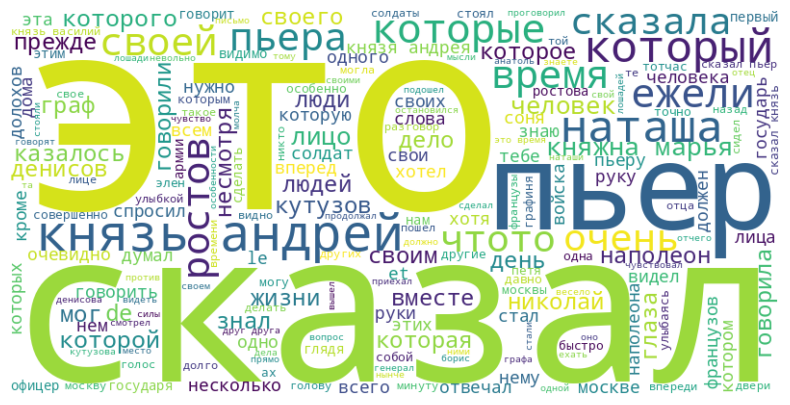

In [50]:
# Создание облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
# Подсчет частоты каждого слова
word_counts = Counter(text.split())

# Создание нового DataFrame с уникальными словами и их частотой
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])

# Сортировка по частоте
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Пример вывода первых 20 строк
print(word_freq_df.head(20))

# Сохранение нового DataFrame в файл

# word_freq_file_path = r'f:\chatepc\chatalx\work\data\word_frequency.csv'
# word_freq_df.to_csv(word_freq_file_path, index=False)

       word  frequency
0       это       2663
1    сказал       2112
2      пьер       1450
3     князь       1379
4    наташа        876
5    андрей        815
6   сказала        770
7     время        758
8   которые        696
9   который        665
10       de        626
11   ростов        615
12   княжна        603
13    своей        571
14    очень        562
15    марья        544
16     лицо        533
17     граф        514
18  человек        507
19    ежели        497


Топ-20 самых частых слов:
       word  frequency
0       это       2663
1    сказал       2112
2      пьер       1450
3     князь       1379
4    наташа        876
5    андрей        815
6   сказала        770
7     время        758
8   которые        696
9   который        665
10       de        626
11   ростов        615
12   княжна        603
13    своей        571
14    очень        562
15    марья        544
16     лицо        533
17     граф        514
18  человек        507
19    ежели        497

Топ-20 самых частых биграмм:
              bigram  frequency
0       князь андрей        791
1       княжна марья        390
2       князя андрея        244
3       сказал князь        164
4        сказал пьер        159
5      князь василий        152
6          это время        139
7         друг друга        126
8    анна михайловна        107
9       князю андрею        104
10    mlle bourienne        103
11     анна павловна         99
12    сказала наташа         95
13           

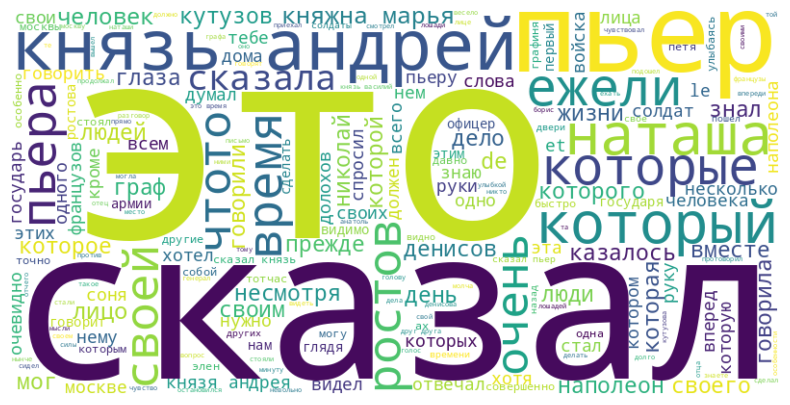

In [52]:

# Объединение всех строк в один текст
text = ' '.join(df['text'])

# Подсчет частоты каждого слова
word_counts = Counter(text.split())

# Создание нового DataFrame с уникальными словами и их частотой
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])

# Сортировка по частоте
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Пример вывода первых 20 строк
print("Топ-20 самых частых слов:")
print(word_freq_df.head(20))

# Подсчет частоты биграмм
def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])

bigrams = Counter(find_ngrams(text.split(), 2))

# Создание нового DataFrame с биграммами и их частотой
bigram_freq_df = pd.DataFrame(bigrams.items(), columns=['bigram', 'frequency'])

# Преобразование биграмм из кортежей в строки
bigram_freq_df['bigram'] = bigram_freq_df['bigram'].apply(lambda x: ' '.join(x))

# Сортировка по частоте
bigram_freq_df = bigram_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Пример вывода первых 20 строк
print("\nТоп-20 самых частых биграмм:")
print(bigram_freq_df.head(20))

# Сохранение новых DataFrame в файлы
# word_freq_file_path = r'f:\chatepc\chatalx\work\data\word_frequency.csv'
# word_freq_df.to_csv(word_freq_file_path, index=False)

bigram_freq_file_path = r'f:\chatepc\chatalx\work\data\bigram_frequency_wp.csv'
bigram_freq_df.to_csv(bigram_freq_file_path, index=False)

# Создание облака слов
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
import pandas as pd
from collections import Counter
import string

# Путь к файлу
file_path = r'f:\chatepc\chatalx\work\data\wp.txt'

# Чтение файла построчно
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Создание DataFrame
df = pd.DataFrame(lines, columns=['text'])

# Удаление символов новой строки '\n' и пробелов по краям, замена пустых строк на NaN
df['text'] = df['text'].str.strip().replace('', pd.NA)

# Удаление строк с NaN значениями в столбце 'text'
df = df.dropna(subset=['text'])

# Добавление индексного столбца 'id'
df.reset_index(inplace=True, drop=True)
df.insert(0, 'id', df.index)

# Приведение всех строк к нижнему регистру
df['text'] = df['text'].str.lower()

# Список стоп-слов
stopwords = set(["сноска","и", "в", "во", "не", "что", "он", "на", "я", "с", "со", "как", "а", "то", "все", "она", "так", "его", "но", "да", "ты", "к", "у", "же", "вы", "за", "бы", "по", "только", "ее", "мне", "было", "вот", "от", "меня", "еще", "нет", "о", "из", "ему", "теперь", "когда", "даже", "ну", "вдруг", "ли", "если", "уже", "или", "ни", "быть", "был", "него", "до", "вас", "нибудь", "опять", "уж", "вам", "ведь", "там", "потом", "себя", "ничего", "ей", "может", "они", "тут", "где", "есть", "надо", "ней", "для", "мы", "тебя", "их", "чем", "была", "сам", "чтоб", "без", "будто", "чего", "раз", "тоже", "себе", "под", "жизнь", "будет", "ж", "тогда", "кто", "этот", "говорил", "того", "потому", "этого", "какой", "совсем", "ним", "здесь", "этом", "один", "почти", "мой", "тем", "чтобы", "нее", "кажется", "сейчас", "были", "куда", "зачем", "сказать", "всех", "никогда", "сегодня", "можно", "при", "наконец", "два", "об", "другой", "хоть", "после", "над", "больше", "тот", "через", "эти", "нас", "про", "них", "какая", "много", "разве", "три", "эту", "моя", "впрочем", "хорошо", "свою", "этой", "перед", "иногда", "лучше", "чуть", "том", "нельзя", "такой", "им", "более", "всегда", "конечно", "всю", "между"])

# Очистка текста от стоп-слов
# Этот код сначала проверяет, является ли x строкой, и только затем выполняет разбиение и фильтрацию.  !!!!
# Добавляем проверку на тип данных перед применением split
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]) if isinstance(x, str) else x)

# Удаление цифр и пунктуации
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)  # Удаление цифр
df['text'] = df['text'].str.translate(str.maketrans('', '', string.punctuation))  # Удаление пунктуации

# Объединение всех строк в один текст
text = ' '.join(df['text'])

# Подсчет частоты биграмм
def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])

bigrams = Counter(find_ngrams(text.split(), 2))

# Создание нового DataFrame с биграммами и их частотой
bigram_freq_df = pd.DataFrame(bigrams.items(), columns=['bigram', 'frequency'])

# Преобразование биграмм из кортежей в строки
bigram_freq_df['bigram'] = bigram_freq_df['bigram'].apply(lambda x: ' '.join(x))

# Сортировка по частоте
bigram_freq_df = bigram_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Пример вывода первых 20 строк
print("Топ-20 самых частых биграмм:")
print(bigram_freq_df.head(20))

# Сохранение нового DataFrame в файл
bigram_freq_file_path = r'f:\chatepc\chatalx\work\data\bigram_frequency_wp.csv'
bigram_freq_df.to_csv(bigram_freq_file_path, index=False)

Топ-20 самых частых биграмм:
              bigram  frequency
0       князь андрей        791
1       княжна марья        390
2          сказал он        359
3       князя андрея        244
4       сказал князь        162
5        сказала она        154
6        сказал пьер        153
7      князь василий        152
8          это время        139
9         друг друга        126
10       несмотря то        114
11   анна михайловна        107
12      князю андрею        104
13    mlle bourienne        103
14     анна павловна         99
15    сказала наташа         95
16           тех пор         95
17  ваше сиятельство         86
18      старый князь         82
19  марья дмитриевна         76


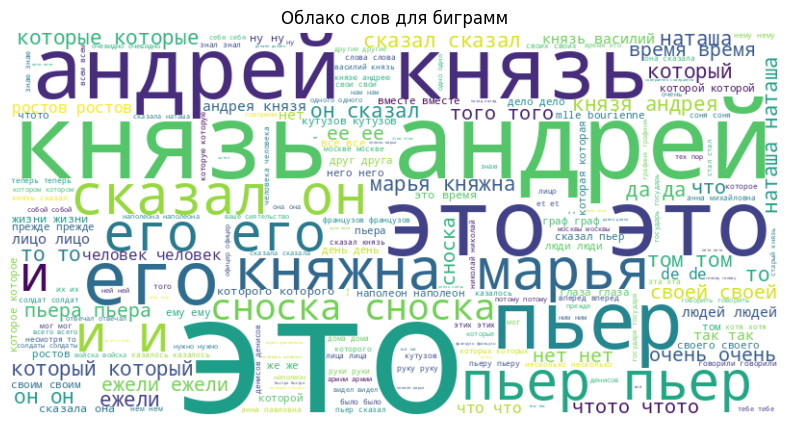

In [54]:
# Создание текста из биграмм для облака слов
bigram_text = ' '.join([' '.join(bigram) for bigram, freq in bigrams.items() for _ in range(freq)])

# Создание и отображение облака слов для биграмм
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)

plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для биграмм')
plt.show()

In [55]:
# Подсчет частоты триграмм
trigrams = Counter(find_ngrams(text.split(), 3))

# Создание нового DataFrame с триграммами и их частотой
trigram_freq_df = pd.DataFrame(trigrams.items(), columns=['trigram', 'frequency'])

# Преобразование триграмм из кортежей в строки
trigram_freq_df['trigram'] = trigram_freq_df['trigram'].apply(lambda x: ' '.join(x))

# Сортировка по частоте
trigram_freq_df = trigram_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Пример вывода первых 20 строк
print("Топ-20 самых частых триграмм:")
print(trigram_freq_df.head(20))

# Сохранение нового DataFrame в файл
trigram_freq_file_path = r'f:\chatepc\chatalx\work\data\trigram_frequency_wp.csv'
trigram_freq_df.to_csv(trigram_freq_file_path, index=False)

Топ-20 самых частых триграмм:
                  trigram  frequency
0     сказал князь андрей        112
1    сказала княжна марья         56
2       граф илья андреич         47
3            тех пор пока         34
4   князь николай андреич         21
5   сказала анна павловна         21
6        чистое дело марш         18
7    сказал князь василий         18
8      думал князь андрей         17
9          лет тому назад         17
10    думала княжна марья         16
11       князь андрей мог         15
12      тех людей которые         15
13       это часто бывает         14
14            que je vous         12
15           нет это быть         12
16              le roi de         12
17   подумал князь андрей         12
18     князь андрей вышел         12
19   спросил князь андрей         12


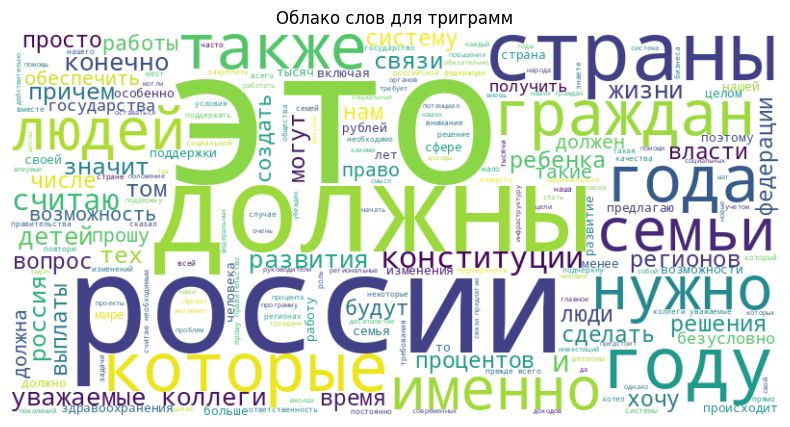

In [29]:
# Создание текста из триграмм для облака слов
trigram_text = ' '.join([' '.join(trigram) for trigram, freq in trigrams.items() for _ in range(freq)])

# Создание и отображение облака слов для триграмм
trigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trigram_text)

plt.figure(figsize=(10, 5))
plt.imshow(trigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для триграмм')
plt.show()

Конечно, давайте добавим код для создания облака слов из биграмм. Я покажу только тот кусок кода, который нужно добавить.

Дополните код для создания облака слов из биграмм:
Python
# Создание текста из биграмм для облака слов
bigram_text = ' '.join([' '.join(bigram) for bigram, freq in bigrams.items() for _ in range(freq)])

# Создание и отображение облака слов для биграмм
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)

plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для биграмм')
plt.show()
Объяснение:
Создание текста из биграмм для облака слов:

bigram_text создается из всех биграмм, где каждая биграмма многократно добавляется в текст в зависимости от ее частоты.
Python
bigram_text = ' '.join([' '.join(bigram) for bigram, freq in bigrams.items() for _ in range(freq)])
Создание и отображение облака слов для биграмм:

WordCloud используется для создания облака слов на основе текста bigram_text.
plt.figure и plt.imshow используются для отображения облака слов.

In [56]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Убедитесь, что необходимые пакеты nltk загружены
nltk.download('punkt')

# Пример текста (здесь должен быть ваш текст "Послание")
file_path = r'f:\chatepc\chatalx\work\data\wp.txt'

# Чтение файла построчно
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Объединение текста в один большой текст для анализа
text = ' '.join(lines)
# Разделение текста на предложения
sentences = sent_tokenize(text)

# Создание DataFrame с предложениями
df = pd.DataFrame(sentences, columns=['sentence'])

# Подсчет количества слов и символов в каждом предложении
df['word_count'] = df['sentence'].apply(lambda x: len(word_tokenize(x)))
df['char_count'] = df['sentence'].apply(lambda x: len(x))

# Подсчет средней длины предложений, слов и символов
average_sentence_length = df['word_count'].mean()
average_word_length = df['char_count'].mean() / df['word_count'].mean()

print(f"Средняя длина предложения (в словах): {average_sentence_length:.2f}")
print(f"Средняя длина слова (в символах): {average_word_length:.2f}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Средняя длина предложения (в словах): 18.38
Средняя длина слова (в символах): 5.03


In [57]:
import pandas as pd

# # Пример текста
# text = """
# Уважаемые коллеги! Сегодня мы обсуждаем важные вопросы. 
# Наши достижения и планы на будущее. Это важный момент для нас.
# """
# Путь к файлу
file_path = r'f:\chatepc\chatalx\work\data\wp.txt'

# Чтение файла построчно
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Объединение текста в один большой текст для анализа
text = ' '.join(lines)
# Разделение текста на предложения
sentences = text.split('.')
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

# Создание DataFrame с предложениями
df = pd.DataFrame(sentences, columns=['sentence'])

# Подсчет количества слов и символов в каждом предложении
df['word_count'] = df['sentence'].apply(lambda x: len(x.split()))
df['char_count'] = df['sentence'].apply(lambda x: len(x))

# Подсчет средней длины предложений, слов и символов
average_sentence_length = df['word_count'].mean()
average_word_length = df['char_count'].mean() / df['word_count'].mean()

print(f"Средняя длина предложения (в словах): {average_sentence_length:.2f}")
print(f"Средняя длина слова (в символах): {average_word_length:.2f}")

Средняя длина предложения (в словах): 16.90
Средняя длина слова (в символах): 6.19


In [58]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Путь к файлу
file_path = r'f:\chatepc\chatalx\work\data\wp.txt'

# Чтение файла
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Создание списка документов (в данном случае у нас один документ)
documents = [text]

# Создание объекта TfidfVectorizer
vectorizer = TfidfVectorizer()

# Преобразование текста в матрицу TF-IDF
tfidf_matrix = vectorizer.fit_transform(documents)

# Получение словарного запаса (всех уникальных слов)
feature_names = vectorizer.get_feature_names_out()

# Преобразование матрицы TF-IDF в DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=feature_names, columns=["TF-IDF"])

# Сортировка DataFrame по значениям TF-IDF
tfidf_df = tfidf_df.sort_values(by="TF-IDF", ascending=False)

# Пример вывода первых 20 строк
print("Топ-20 ключевых слов по TF-IDF:")
print(tfidf_df.head(20))

# Сохранение DataFrame в файл
tfidf_file_path = r'f:\chatepc\chatalx\work\data\tfidf_analysis__wp.csv'
tfidf_df.to_csv(tfidf_file_path)

Топ-20 ключевых слов по TF-IDF:
          TF-IDF
не      0.419721
что     0.400273
он      0.362440
на      0.326824
как     0.199605
его     0.191198
то      0.178633
она     0.134333
но      0.133317
все     0.132393
это     0.123893
было    0.121121
так     0.097701
сказал  0.097562
за      0.093820
по      0.093266
из      0.090171
же      0.087630
ему     0.085321
от      0.084397


In [59]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Путь к файлу
file_path = r'f:\chatepc\chatalx\work\data\wp.txt'

# Чтение файла
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Создание списка документов (в данном случае у нас один документ)
documents = [text]

# Создание объекта TfidfVectorizer для биграмм
vectorizer = TfidfVectorizer(ngram_range=(2, 2))

# Преобразование текста в матрицу TF-IDF для биграмм
tfidf_matrix = vectorizer.fit_transform(documents)

# Получение словарного запаса (всех уникальных биграмм)
feature_names = vectorizer.get_feature_names_out()

# Преобразование матрицы TF-IDF в DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=feature_names, columns=["TF-IDF"])

# Сортировка DataFrame по значениям TF-IDF
tfidf_df = tfidf_df.sort_values(by="TF-IDF", ascending=False)

# Пример вывода первых 20 строк
print("Топ-20 ключевых биграмм по TF-IDF:")
print(tfidf_df.head(20))

# Сохранение DataFrame в файл
tfidf_file_path = r'f:\chatepc\chatalx\work\data\tfidf_bigrams_analysis_wp_.csv'
tfidf_df.to_csv(tfidf_file_path)

Топ-20 ключевых биграмм по TF-IDF:
                TF-IDF
что он        0.307113
князь андрей  0.269919
то что        0.235795
он не         0.179150
сказал он     0.175396
что то        0.173348
как будто     0.154580
потому что    0.138884
княжна марья  0.133083
ничего не     0.120798
не было       0.116021
так же        0.109196
том что       0.108855
не мог        0.103736
на него       0.103395
что она       0.102712
как он        0.102371
того что      0.098276
он был        0.091793
несмотря на   0.090769


In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Путь к файлу
file_path = r'f:\chatepc\chatalx\work\data\wp.txt'

# Чтение файла
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Создание списка документов (в данном случае у нас один документ)
documents = [text]

# Создание объекта TfidfVectorizer для триграмм
vectorizer = TfidfVectorizer(ngram_range=(3, 3))

# Преобразование текста в матрицу TF-IDF для триграмм
tfidf_matrix = vectorizer.fit_transform(documents)

# Получение словарного запаса (всех уникальных триграмм)
feature_names = vectorizer.get_feature_names_out()

# Преобразование матрицы TF-IDF в DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=feature_names, columns=["TF-IDF"])

# Сортировка DataFrame по значениям TF-IDF
tfidf_df = tfidf_df.sort_values(by="TF-IDF", ascending=False)

# Пример вывода первых 20 строк
print("Топ-20 ключевых триграмм по TF-IDF:")
print(tfidf_df.head(20))

# Сохранение DataFrame в файл
tfidf_file_path = r'f:\chatepc\chatalx\work\data\tfidf_trigrams_analysis_wp_.csv'
tfidf_df.to_csv(tfidf_file_path)

Топ-20 ключевых триграмм по TF-IDF:
                        TF-IDF
для того чтобы        0.177258
то время как          0.151158
на то что             0.148984
так же как            0.137021
то что он             0.129409
несмотря на то        0.129409
сказал князь андрей   0.119622
на другой день        0.100047
точно так же          0.096785
не может быть         0.096785
он не мог             0.095697
что он не             0.094610
не только не          0.077210
со всех сторон        0.071773
потому что он         0.066336
за то что             0.066336
сказала княжна марья  0.058723
как будто он          0.056549
видно было что        0.056549
она не могла          0.054374
